In [28]:
import pandas as pd
import numpy as np
df=pd.read_csv('clean_df.csv')
df

Unnamed: 0  symboling  normalized-losses         make aspiration  \
0             0          3                122  alfa-romero        std   
1             1          3                122  alfa-romero        std   
2             2          1                122  alfa-romero        std   
3             3          2                164         audi        std   
4             4          2                164         audi        std   
5             5          2                122         audi        std   
6             6          1                158         audi        std   
7             7          1                122         audi        std   
8             8          1                158         audi      turbo   
9             9          2                192          bmw        std   
10           10          0                192          bmw        std   
11           11          0                188          bmw        std   
12           12          0                188          bmw        std   
13           13          1                122          bmw        std   
14           14          0                122          bmw        std   
15           15          0                122          bmw        std   
16           16          0                122          bmw        std   
17           17          2                121    chevrolet        std   
18           18          1                 98    chevrolet        std   
19           19          0                 81    chevrolet        std   
20           20          1                118        dodge        std   
21           21          1                118        dodge        std   
22           22          1                118        dodge      turbo   
23           23          1                148        dodge        std   
24           24          1                148        dodge        std   
25           25          1                148        dodge        std   
26           26          1                148        dodge      turbo   
27           27         -1                110        dodge        std   
28           28          3                145        dodge      turbo   
29           29          2                137        honda        std   
..          ...        ...                ...          ...        ...   
171         171         -1                 65       toyota        std   
172         172         -1                 65       toyota        std   
173         173         -1                 65       toyota        std   
174         174          3                197       toyota        std   
175         175          3                197       toyota        std   
176         176         -1                 90       toyota        std   
177         177         -1                122       toyota        std   
178         178          2                122   volkswagen        std   
179         179          2                122   volkswagen        std   
180         180          2                 94   volkswagen        std   
181         181          2                 94   volkswagen        std   
182         182          2                 94   volkswagen        std   
183         183          2                 94   volkswagen      turbo   
184         184          2                 94   volkswagen        std   
185         185          3                122   volkswagen        std   
186         186          3                256   volkswagen        std   
187         187          0                122   volkswagen        std   
188         188          0                122   volkswagen      turbo   
189         189          0                122   volkswagen        std   
190         190         -2                103        volvo        std   
191         191         -1                 74        volvo        std   
192         192         -2                103        volvo        std   
193         193         -1                 74        volvo     

In [30]:
from sklearn.model_selection import train_test_split
X=df.loc[:,['engine-size','city-mpg']]
X.head()
y=df.price

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=0)
#seed value for same random seeding in train_test_split 

In [32]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.7538626735985758
0.8154331886071264


In [33]:
from pandas import DataFrame,Series
coeff=DataFrame(X_train.columns)
coeff['Coeffient Estimate']=Series(clf.coef_)
coeff

0  Coeffient Estimate
0  engine-size          130.979375
1     city-mpg         -250.723609

In [34]:
clf.intercept_

2584.6221025099803

In [35]:
predict=clf.predict(X_test)
predict

array([ 4845.26872447,  9470.64509348, 16225.39688657, 22029.58763056,
       18908.55291333, 10091.83654437, 15634.06853837,  5859.39830036,
       18800.04382107,  7898.8925935 , 12045.29202798, 23732.31950555,
        6012.84795809,  8467.75065896, 18253.65603834, 15634.06853837,
        7113.0163435 , 13167.93069613, 10222.81591937,  6862.29273488,
        6012.84795809, 10963.75160389, 32616.44672272,  8149.61620213,
        9538.05594169, 23732.31950555, 10091.83654437, 10844.00737026,
       17598.75916335, 32616.44672272, 26198.45734778,  9051.39436433,
        7865.18716939, 16225.39688657,  9403.23424527, 10593.28376163,
       13167.93069613, 15884.792147  , 12296.01563661, 13538.39853839,
        7517.18960987, 21037.92833741,  9403.23424527, 15473.22606068,
       15690.24424521, 12363.42648482, 15480.61888063,  6862.29273488,
        6600.33398488, 10462.30438663, 38892.22158128])

In [37]:
mse=np.mean((predict-y_test)**2)
np.sqrt(mse)

4049.1591294726654

In [38]:
df[['highway-mpg','city-mpg']].corr()

highway-mpg  city-mpg
highway-mpg     1.000000  0.972044
city-mpg        0.972044  1.000000

In [39]:
df.corr()


Unnamed: 0  symboling  normalized-losses  wheel-base  \
Unnamed: 0           1.000000  -0.162764          -0.241092    0.125517   
symboling           -0.162764   1.000000           0.466264   -0.535987   
normalized-losses   -0.241092   0.466264           1.000000   -0.056661   
wheel-base           0.125517  -0.535987          -0.056661    1.000000   
length               0.161848  -0.365404           0.019424    0.876024   
width                0.043976  -0.242423           0.086802    0.814507   
height               0.252015  -0.550160          -0.373737    0.590742   
curb-weight          0.064820  -0.233118           0.099404    0.782097   
engine-size         -0.047764  -0.110581           0.112360    0.572027   
bore                 0.244734  -0.140019          -0.029862    0.493244   
stroke              -0.163636  -0.008245           0.055563    0.158502   
compression-ratio    0.144301  -0.182196          -0.114713    0.250313   
horsepower          -0.022474   0.075819           0.217299    0.371147   
peak-rpm            -0.195662   0.279740           0.239543   -0.360305   
city-mpg             0.027956  -0.035527          -0.225016   -0.470606   
highway-mpg          0.020344   0.036233          -0.181877   -0.543304   
price               -0.118214  -0.082391           0.133999    0.584642   
city-L/100km        -0.099157   0.066171           0.238567    0.476153   
diesel               0.121454  -0.196735          -0.101546    0.307237   
gas                 -0.121454   0.196735           0.101546   -0.307237   

                     length     width    height  curb-weight  engine-size  \
Unnamed: 0         0.161848  0.043976  0.252015     0.064820    -0.047764   
symboling         -0.365404 -0.242423 -0.550160    -0.233118    -0.110581   
normalized-losses  0.019424  0.086802 -0.373737     0.099404     0.112360   
wheel-base         0.876024  0.814507  0.590742     0.782097     0.572027   
length             1.000000  0.857170  0.492063     0.880665     0.685025   
width              0.857170  1.000000  0.306002     0.866201     0.729436   
height             0.492063  0.306002  1.000000     0.307581     0.074694   
curb-weight        0.880665  0.866201  0.307581     1.000000     0.849072   
engine-size        0.685025  0.729436  0.074694     0.849072     1.000000   
bore               0.608971  0.544885  0.180449     0.644060     0.572609   
stroke             0.124139  0.188829 -0.062704     0.167562     0.209523   
compression-ratio  0.159733  0.189867  0.259737     0.156433     0.028889   
horsepower         0.579821  0.615077 -0.087027     0.757976     0.822676   
peak-rpm          -0.285970 -0.245800 -0.309974    -0.279361    -0.256733   
city-mpg          -0.665192 -0.633531 -0.049800    -0.749543    -0.650546   
highway-mpg       -0.698142 -0.680635 -0.104812    -0.794889    -0.679571   
price              0.690628  0.751265  0.135486     0.834415     0.872335   
city-L/100km       0.657373  0.673363  0.003811     0.785353     0.745059   
diesel             0.211187  0.244356  0.281578     0.221046     0.070779   
gas               -0.211187 -0.244356 -0.281578    -0.221046    -0.070779   

                       bore    stroke  compression-ratio  horsepower  \
Unnamed: 0         0.244734 -0.163636           0.144301   -0.022474   
symboling         -0.140019 -0.008245          -0.182196    0.075819   
normalized-losses -0.029862  0.055563          -0.114713    0.217299   
wheel-base         0.493244  0.158502           0.250313    0.371147   
length             0.608971  0.124139           0.159733    0.579821   
width              0.544885  0.188829           0.189867    0.615077   
height             0.180449 -0.062704           0.259737   -0.087027   
curb-weight        0.644060  0.167562           0.156433    0.757976   
engine-size        0.572609  0.209523           0.028889    0.822676   
bore               1.000000 -0.055390           0.001263    0.566936   
stroke            -0.055390  1.00

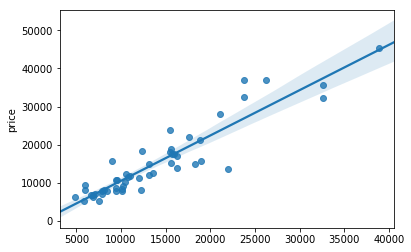

In [51]:
import seaborn as sns
sns.regplot(x=predict,y=
           )